In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os # accessing directory structure
import seaborn as sns
color_pal= sns.color_palette()
plt.style.use('ggplot') # make it pretty
import seaborn as sns
import xgboost as xgb

In [2]:
df = pd.read_parquet('Data/est_hourly.paruqet')

In [3]:
df.shape

(178262, 12)

In [4]:
df.tail()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178262 entries, 1998-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AEP       121273 non-null  float64
 1   COMED     66497 non-null   float64
 2   DAYTON    121275 non-null  float64
 3   DEOK      57739 non-null   float64
 4   DOM       116189 non-null  float64
 5   DUQ       119068 non-null  float64
 6   EKPC      45334 non-null   float64
 7   FE        62874 non-null   float64
 8   NI        58450 non-null   float64
 9   PJME      145366 non-null  float64
 10  PJMW      143206 non-null  float64
 11  PJM_Load  32896 non-null   float64
dtypes: float64(12)
memory usage: 17.7 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AEP,121273.0,15499.513717,2591.399065,9581.0,13630.0,15310.0,17200.00,25695.0
COMED,66497.0,11420.152112,2304.139517,7237.0,9780.0,11152.0,12510.00,23753.0
DAYTON,121275.0,2037.851140,393.403153,982.0,1749.0,2009.0,2279.00,3746.0
DEOK,57739.0,3105.096486,599.859026,907.0,2687.0,3013.0,3449.00,5445.0
DOM,116189.0,10949.203625,2413.946569,1253.0,9322.0,10501.0,12378.00,21651.0
DUQ,119068.0,1658.820296,301.740640,1014.0,1444.0,1630.0,1819.00,3054.0
EKPC,45334.0,1464.218423,378.868404,514.0,1185.0,1386.0,1699.00,3490.0
FE,62874.0,7792.159064,1331.268006,0.0,6807.0,7700.0,8556.00,14032.0
NI,58450.0,11701.682943,2371.498701,7003.0,9954.0,11521.0,12896.75,23631.0
PJME,145366.0,32080.222831,6464.012166,14544.0,27573.0,31421.0,35650.00,62009.0


In [7]:
#df = df.set_index('Datetime')

<AxesSubplot:title={'center':'PJME_Power_Dist'}, xlabel='Datetime'>

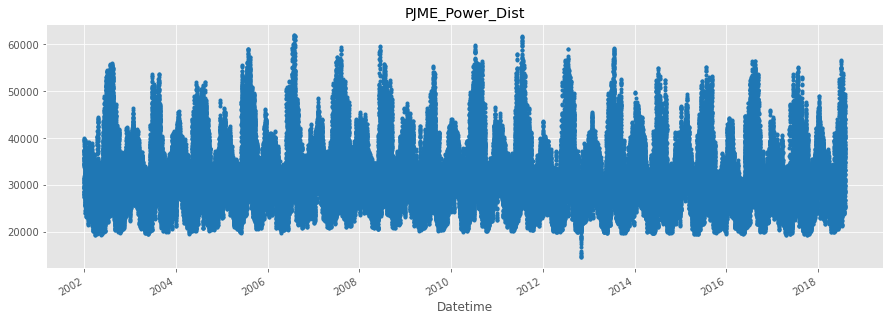

In [8]:
df['PJME'].plot(style = '.', figsize=(15, 5), color=color_pal[0], title = 'PJME_Power_Dist')

In [9]:
df.index

DatetimeIndex(['1998-12-31 01:00:00', '1998-12-31 02:00:00',
               '1998-12-31 03:00:00', '1998-12-31 04:00:00',
               '1998-12-31 05:00:00', '1998-12-31 06:00:00',
               '1998-12-31 07:00:00', '1998-12-31 08:00:00',
               '1998-12-31 09:00:00', '1998-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=178262, freq=None)

# Train/Test Split

<AxesSubplot:xlabel='Datetime'>

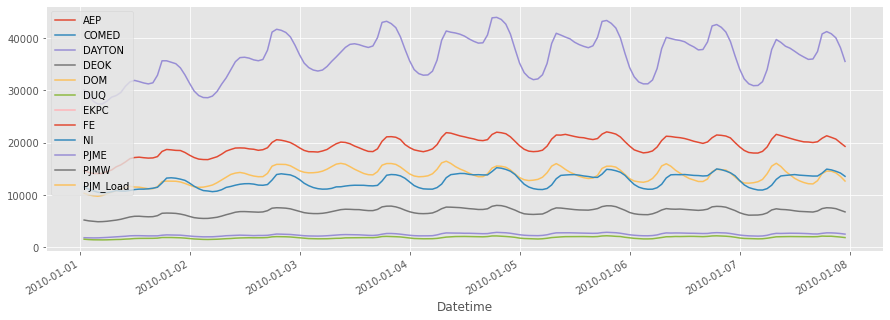

In [12]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5))

In [38]:
# feature creation using datetime features
def create_dt_features(df):
    """
    create datetime features in dataframe
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [39]:
df = create_dt_features(df)

In [50]:
df.head()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,,,,,,,,,,,,
1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0,1,3,4,12,1998,365
1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0,2,3,4,12,1998,365
1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0,3,3,4,12,1998,365
1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0,4,3,4,12,1998,365
1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0,5,3,4,12,1998,365


In [52]:
df.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear'],
      dtype='object')

In [54]:
df_PJME = df[[ 'PJME', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear']]

In [58]:
df_PJME = df_PJME.dropna()

In [59]:
df_PJME.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PJME       145366 non-null  float64
 1   hour       145366 non-null  int64  
 2   dayofweek  145366 non-null  int64  
 3   quarter    145366 non-null  int64  
 4   month      145366 non-null  int64  
 5   year       145366 non-null  int64  
 6   dayofyear  145366 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 8.9 MB


In [61]:
# split date on Jan 2015 as cut off for test train

train = df_PJME.loc[df_PJME.index < '01-01-2015']
test = df_PJME.loc[df_PJME.index >= '01-01-2015']

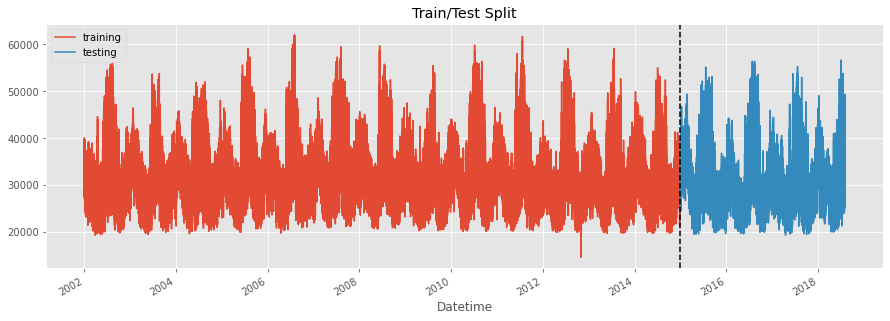

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label = 'training', title = 'Train/Test Split')
test.plot(ax=ax, label = 'testing')
ax.axvline('01-01-2015', color = 'black', ls = '--')
ax.legend([ 'training', 'testing'])
plt.show()

In [33]:
df.tail()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,,,,,,,,,,,,
2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN,20,0,1,1,2018,1
2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN,21,0,1,1,2018,1
2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN,22,0,1,1,2018,1
2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN,23,0,1,1,2018,1
2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN,0,1,1,1,2018,2


# Visualize relationships 

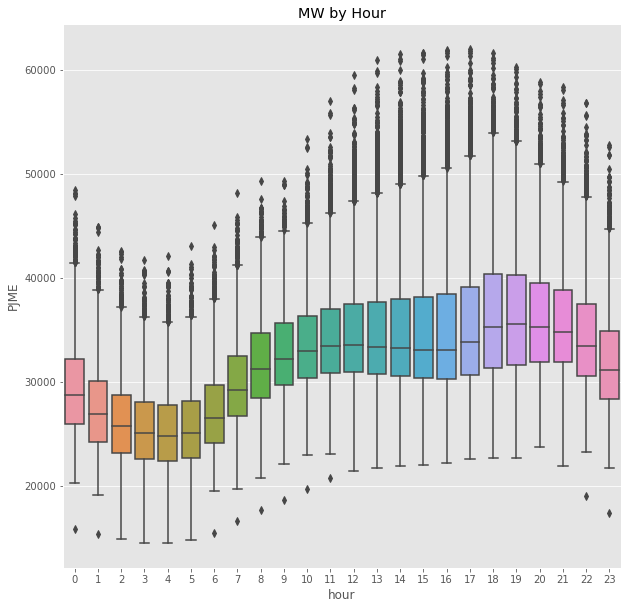

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x='hour', y='PJME')
ax.set_title('MW by Hour')
plt.show()


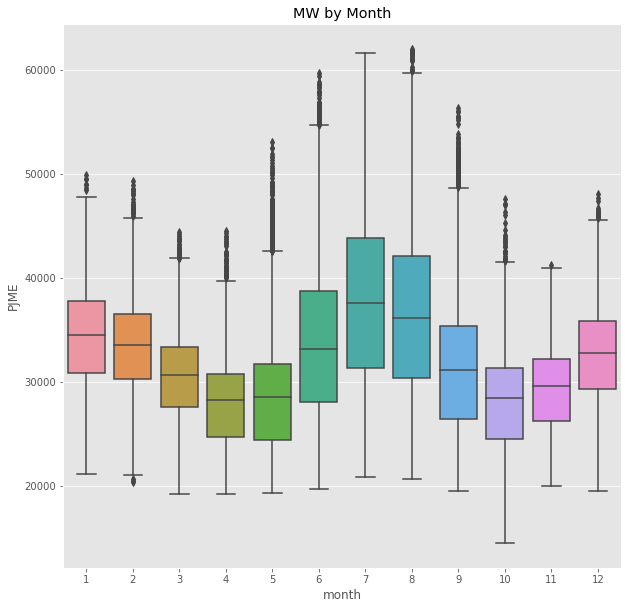

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x='month', y='PJME')
ax.set_title('MW by Month')
plt.show()

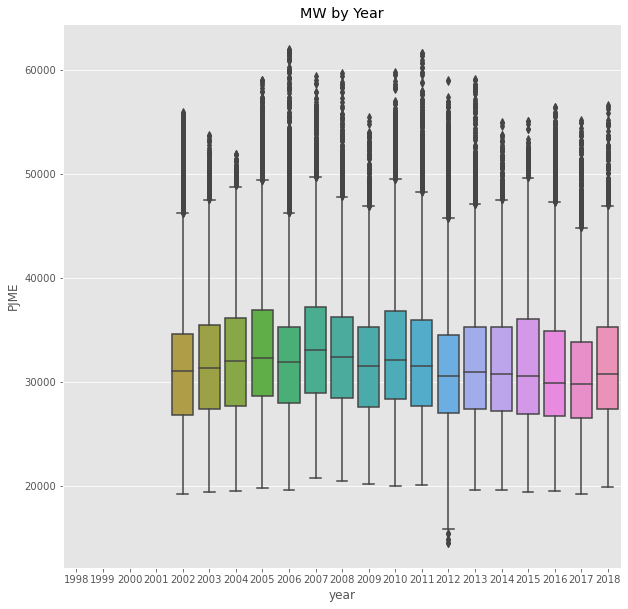

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x='year', y='PJME')
ax.set_title('MW by Year')
plt.show()

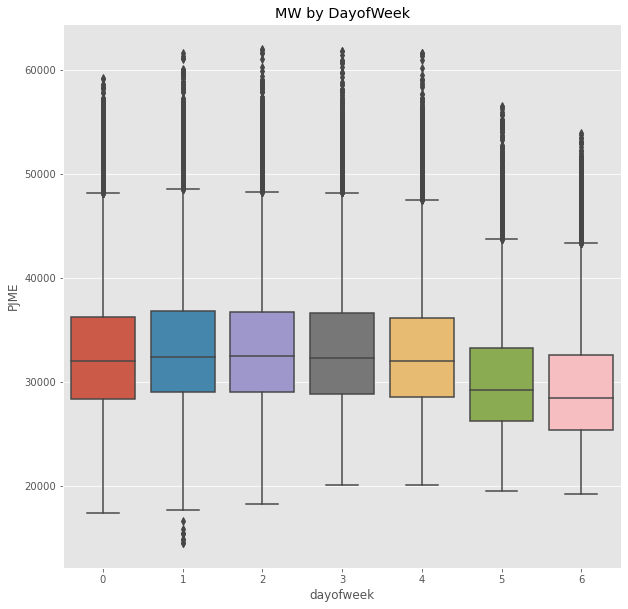

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df, x='dayofweek', y='PJME')
ax.set_title('MW by DayofWeek')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error

# Create Model

In [42]:
df.columns

Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear'],
      dtype='object')

In [48]:
train.head()

Datetime
1998-12-31 01:00:00   NaN
1998-12-31 02:00:00   NaN
1998-12-31 03:00:00   NaN
1998-12-31 04:00:00   NaN
1998-12-31 05:00:00   NaN
Name: PJME, dtype: float64

In [49]:
Target.head()

AttributeError: 'list' object has no attribute 'head'

In [62]:
Features = ['hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear']
Target = ['PJME']

In [63]:
X_train = train[Features]
y_train = train[Target]

X_test = test[Features]
y_test = test[Target]

In [65]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50, learning_rate=0.01)

reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100) 

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.17856	validation_1-rmse:11516.21767
[200]	validation_0-rmse:5373.20460	validation_1-rmse:5164.97392
[300]	validation_0-rmse:3375.48321	validation_1-rmse:3834.00707
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[450]	validation_0-rmse:2771.93085	validation_1-rmse:3730.77469


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Feature Importance 

In [67]:
fi = pd.DataFrame(data = reg.feature_importances_, index = reg.feature_names_in_, columns=['importance']) 

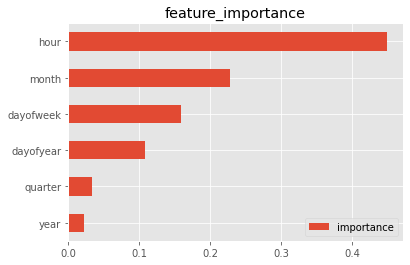

In [70]:
fi.sort_values('importance').plot(kind='barh', title='feature_importance')
plt.show()

# Forecsting on the Test Set

In [72]:
test['prediction'] = reg.predict(X_test)

/var/folders/w6/sy887bgd32s1j5gq5fj42l000000gn/T/ipykernel_55959/2903689382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [73]:
test.head()

,PJME,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31861.591797
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365,28268.078125
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365,27164.314453
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365,26900.753906
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365,26900.753906


In [75]:
df_PJME = df_PJME.merge(test[['prediction']], how='left', left_index=True, right_index = True)

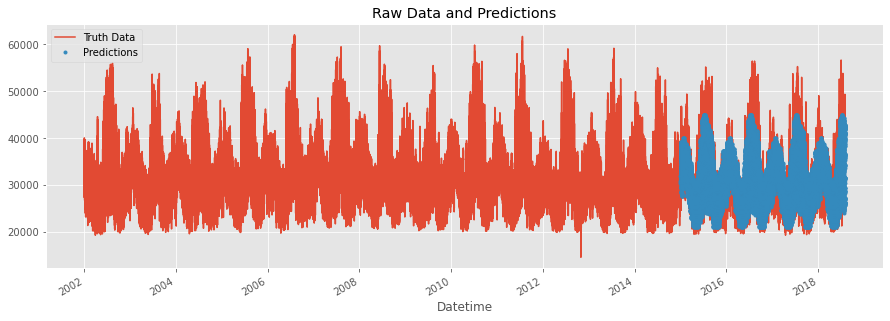

In [78]:
ax = df_PJME[['PJME']].plot(figsize=(15, 5))
df_PJME['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()

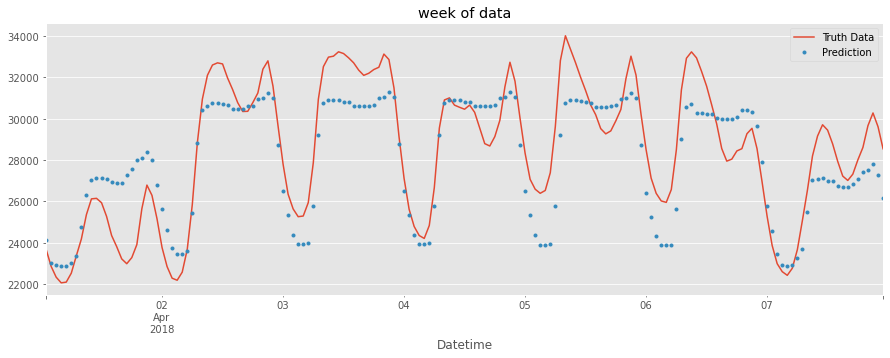

In [79]:
ax = df_PJME.loc[(df_PJME.index > '04-01-2018') & (df_PJME.index < '04-08-2018')]['PJME'] \
    .plot(figsize=(15,5), title = 'week of data')
df_PJME.loc[(df_PJME.index > '04-01-2018') & (df_PJME.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [82]:
score = np.sqrt(mean_squared_error(test['PJME'], test['prediction']))
print(f'RSME Score on Test Set: {score:0.2f}')

RSME Score on Test Set: 3715.93


In [85]:
# Calculate the error

test['error'] = np.abs(test[Target] - test['prediction'])

/var/folders/w6/sy887bgd32s1j5gq5fj42l000000gn/T/ipykernel_55959/990133487.py:3: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  test['error'] = np.abs(test[Target] - test['prediction'])


ValueError: cannot reindex on an axis with duplicate labels